# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [1]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [ ]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [ ]:
# Note the way each array is printed:
a,b,c,d

In [ ]:
c

In [ ]:
c[0,1,2]

In [ ]:
## Arithmetic in arrays is element wise

In [17]:
a = np.array( [20,30,40,50] )
b = np.arange( 2 )
c = np.ones((3, 2))
b

array([0, 1])

In [18]:
d = c + b
d

array([[ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.]])

In [4]:
np.log(b)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([       -inf,  0.        ,  0.69314718,  1.09861229])

## Indexing, Slicing and Iterating

In [19]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [20]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [21]:
a[2:5]

array([ 4,  9, 16])

In [ ]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [22]:
b = np.random.randint(1,100,(4,4))

In [23]:
b

array([[28, 54, 85, 26],
       [ 2, 71,  1, 63],
       [67, 72, 73, 79],
       [92, 43, 11, 67]])

In [24]:
# Guess the output
print(b[2,3])
print(b[0,0])


79
28


In [27]:
b[0:3,0]

array([28,  2, 67])

In [26]:
b[:,1]

array([54, 71, 72, 43])

In [ ]:
b[1:3,:]

In [31]:
b[-1:, -2:]

array([[73, 79],
       [11, 67]])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.date_range?

In [36]:
pd.__version__

u'0.20.1'

In [37]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [38]:
df

,A,B,C,D
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524
2014-01-02,1.595129,0.032413,-0.139622,-0.185802
2014-01-03,-0.526565,0.345424,0.409399,1.676133
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694
2014-01-05,-1.255385,0.776509,1.433163,1.206457
2014-01-06,-1.032564,-1.112401,0.062671,0.029112


In [40]:
# Index, columns, underlying numpy data
df.T


,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,0.383182,1.595129,-0.526565,0.159823,-1.255385,-1.032564
B,-0.610517,0.032413,0.345424,-0.961353,0.776509,-1.112401
C,-2.006936,-0.139622,0.409399,-1.578291,1.433163,0.062671
D,-0.386524,-0.185802,1.676133,-0.025694,1.206457,0.029112


In [41]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [42]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
A    4 non-null float64
B    4 non-null datetime64[ns]
C    4 non-null float32
D    4 non-null int32
E    4 non-null object
dtypes: datetime64[ns](1), float32(1), float64(1), int32(1), object(1)
memory usage: 160.0+ bytes


#### Viewing Data

In [46]:
df.head(2)

,A,B,C,D
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524
2014-01-02,1.595129,0.032413,-0.139622,-0.185802


In [45]:
df.tail()

,A,B,C,D
2014-01-02,1.595129,0.032413,-0.139622,-0.185802
2014-01-03,-0.526565,0.345424,0.409399,1.676133
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694
2014-01-05,-1.255385,0.776509,1.433163,1.206457
2014-01-06,-1.032564,-1.112401,0.062671,0.029112


In [52]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.112730,-0.254988,-0.303269,0.385614
std,1.054515,0.757310,1.281557,0.843588
min,-1.255385,-1.112401,-2.006936,-0.386524
25%,-0.906064,-0.873644,-1.218624,-0.145775
50%,-0.183371,-0.289052,-0.038476,0.001709
75%,0.327343,0.267171,0.322717,0.912121
max,1.595129,0.776509,1.433163,1.676133


In [53]:
df.sort_values(by='B')


,A,B,C,D
2014-01-06,-1.032564,-1.112401,0.062671,0.029112
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524
2014-01-02,1.595129,0.032413,-0.139622,-0.185802
2014-01-03,-0.526565,0.345424,0.409399,1.676133
2014-01-05,-1.255385,0.776509,1.433163,1.206457


### Selection

In [54]:
df[['A','B']]

,A,B
2014-01-01,0.383182,-0.610517
2014-01-02,1.595129,0.032413
2014-01-03,-0.526565,0.345424
2014-01-04,0.159823,-0.961353
2014-01-05,-1.255385,0.776509
2014-01-06,-1.032564,-1.112401


In [55]:
df[0:3]

,A,B,C,D
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524
2014-01-02,1.595129,0.032413,-0.139622,-0.185802
2014-01-03,-0.526565,0.345424,0.409399,1.676133


In [56]:
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [57]:
# By label
df.loc[dates[0]]

A    0.383182
B   -0.610517
C   -2.006936
D   -0.386524
Name: 2014-01-01 00:00:00, dtype: float64

In [58]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,0.383182,-0.610517
2014-01-02,1.595129,0.032413
2014-01-03,-0.526565,0.345424
2014-01-04,0.159823,-0.961353
2014-01-05,-1.255385,0.776509
2014-01-06,-1.032564,-1.112401


In [59]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,0.032413
2014-01-03,0.345424
2014-01-04,-0.961353


In [63]:
# Fast access to scalar
df.at[dates[1],'B']

0.032412868107746629

In [61]:
# iloc provides integer locations similar to np style
df.iloc[3:,1:2]

,B
2014-01-04,-0.961353
2014-01-05,0.776509
2014-01-06,-1.112401


### Boolean Indexing

In [64]:
df.A < 0

2014-01-01    False
2014-01-02    False
2014-01-03     True
2014-01-04    False
2014-01-05     True
2014-01-06     True
Freq: D, Name: A, dtype: bool

In [65]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-03,-0.526565,0.345424,0.409399,1.676133
2014-01-05,-1.255385,0.776509,1.433163,1.206457
2014-01-06,-1.032564,-1.112401,0.062671,0.029112


### Setting

In [66]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [67]:
df_posA

,A,B,C,D
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524
2014-01-02,1.595129,0.032413,-0.139622,-0.185802
2014-01-03,0.526565,-0.345424,-0.409399,-1.676133
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694
2014-01-05,1.255385,-0.776509,-1.433163,-1.206457
2014-01-06,1.032564,1.112401,-0.062671,-0.029112


In [68]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [69]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [70]:
df['F'] = s1

In [71]:
df

,A,B,C,D,F
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524,NaN
2014-01-02,1.595129,0.032413,-0.139622,-0.185802,1.0
2014-01-03,-0.526565,0.345424,0.409399,1.676133,2.0
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694,3.0
2014-01-05,-1.255385,0.776509,1.433163,1.206457,4.0
2014-01-06,-1.032564,-1.112401,0.062671,0.029112,5.0


### Missing Data

In [72]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [73]:
df1

,A,B,C,D,F,E
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524,NaN,NaN
2014-01-02,1.595129,0.032413,-0.139622,-0.185802,1.0,NaN
2014-01-03,-0.526565,0.345424,0.409399,1.676133,2.0,NaN
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694,3.0,NaN


In [74]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [75]:
df1

,A,B,C,D,F,E
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524,NaN,1.0
2014-01-02,1.595129,0.032413,-0.139622,-0.185802,1.0,1.0
2014-01-03,-0.526565,0.345424,0.409399,1.676133,2.0,NaN
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694,3.0,NaN


In [78]:
# find where values are null
df1[pd.isnull(df1.E)] = 0

In [79]:
df1

,A,B,C,D,F,E
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524,NaN,1.0
2014-01-02,1.595129,0.032413,-0.139622,-0.185802,1.0,1.0
2014-01-03,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2014-01-04,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [80]:
df1.fillna?

### Operations

In [82]:
df.mean(1)

2014-01-01   -0.655199
2014-01-02    0.460423
2014-01-03    0.780878
2014-01-04    0.118897
2014-01-05    1.232149
2014-01-06    0.589364
Freq: D, dtype: float64

In [ ]:
df.mean(),df.mean(1) # Operation on two different axes

### Applying functions

In [83]:
df

,A,B,C,D,F
2014-01-01,0.383182,-0.610517,-2.006936,-0.386524,NaN
2014-01-02,1.595129,0.032413,-0.139622,-0.185802,1.0
2014-01-03,-0.526565,0.345424,0.409399,1.676133,2.0
2014-01-04,0.159823,-0.961353,-1.578291,-0.025694,3.0
2014-01-05,-1.255385,0.776509,1.433163,1.206457,4.0
2014-01-06,-1.032564,-1.112401,0.062671,0.029112,5.0


In [ ]:
df.apply(np.cumsum)

In [90]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2014-01-01    2.390118
2014-01-02    1.780931
2014-01-03    2.526565
2014-01-04    4.578291
2014-01-05    5.255385
2014-01-06    6.112401
Freq: D, dtype: float64

In [88]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [91]:
np.random.randn(10,4)

array([[-0.5049038 , -0.20887887, -0.10815297,  1.64200618],
       [ 2.14127292, -2.32318415,  0.66023581,  1.38786009],
       [-0.53419469,  0.25510275, -0.9538361 ,  2.0389301 ],
       [ 0.89443287, -0.0282289 , -1.66239951,  0.4349093 ],
       [-0.37469022,  1.27461189, -0.93596202, -1.51400364],
       [ 0.63260979,  1.09030308, -0.83177893,  0.42597825],
       [ 1.46990581, -0.49347783, -0.20156876, -0.10770944],
       [ 0.33197249,  1.86062091,  0.26188917,  0.94141605],
       [-1.48151082, -0.08005261, -1.11741535,  0.52266273],
       [ 0.69616227,  1.69077503, -0.6067927 ,  0.70717853]])

In [92]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.009725,0.324126,-1.449552,-1.743360
1,0.205685,0.177663,0.163517,0.808765
2,-1.404953,0.449523,0.913677,0.398288
3,1.768331,-0.240425,0.662775,-0.302897
4,-0.823437,0.492454,1.214424,-0.364950
5,-0.030264,-0.226998,0.115447,-0.507663
6,1.278320,-0.217901,-0.474617,1.998007
7,-1.459200,-0.182441,0.897009,-0.235960
8,0.900593,-2.582878,1.170011,0.027364
9,1.575120,-0.536649,0.397178,-1.490317


In [93]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0  0.009725  0.324126 -1.449552 -1.743360
 1  0.205685  0.177663  0.163517  0.808765
 2 -1.404953  0.449523  0.913677  0.398288,
           0         1         2         3
 3  1.768331 -0.240425  0.662775 -0.302897
 4 -0.823437  0.492454  1.214424 -0.364950
 5 -0.030264 -0.226998  0.115447 -0.507663
 6  1.278320 -0.217901 -0.474617  1.998007,
           0         1         2         3
 7 -1.459200 -0.182441  0.897009 -0.235960
 8  0.900593 -2.582878  1.170011  0.027364
 9  1.575120 -0.536649  0.397178 -1.490317]

In [94]:
pd.concat(pieces)

,0,1,2,3
0,0.009725,0.324126,-1.449552,-1.743360
1,0.205685,0.177663,0.163517,0.808765
2,-1.404953,0.449523,0.913677,0.398288
3,1.768331,-0.240425,0.662775,-0.302897
4,-0.823437,0.492454,1.214424,-0.364950
5,-0.030264,-0.226998,0.115447,-0.507663
6,1.278320,-0.217901,-0.474617,1.998007
7,-1.459200,-0.182441,0.897009,-0.235960
8,0.900593,-2.582878,1.170011,0.027364
9,1.575120,-0.536649,0.397178,-1.490317


In [111]:
# Also can "Join" and "Append"
df.merge?

### Grouping


In [97]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [98]:
df

,A,B,C,D
0,foo,one,-0.598625,0.618815
1,bar,one,-0.463625,0.537790
2,foo,two,-0.514053,-0.982736
3,bar,three,-0.299022,-0.471625
4,foo,two,0.170302,-1.132356
5,bar,two,0.736370,-0.328089
6,foo,one,0.710809,0.450836
7,foo,three,0.285980,-0.384682


In [99]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.463625  0.537790
    three -0.299022 -0.471625
    two    0.736370 -0.328089
foo one    0.112184  1.069651
    three  0.285980 -0.384682
    two   -0.343750 -2.115092

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [100]:
a = df.groupby(['A','B']).sum()

In [101]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar -0.463625 -0.299022  0.736370  0.537790 -0.471625 -0.328089
foo  0.056092  0.285980 -0.171875  0.534825 -0.384682 -1.057546

### Time Series


In [102]:
import pandas as pd
import numpy as np

In [103]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [104]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [105]:
ts

2014-01-01 00:00:00    182
2014-01-01 00:00:01      4
2014-01-01 00:00:02     40
2014-01-01 00:00:03    425
2014-01-01 00:00:04    276
2014-01-01 00:00:05    178
2014-01-01 00:00:06    189
2014-01-01 00:00:07    264
2014-01-01 00:00:08    150
2014-01-01 00:00:09     57
2014-01-01 00:00:10    429
2014-01-01 00:00:11    453
2014-01-01 00:00:12    460
2014-01-01 00:00:13    229
2014-01-01 00:00:14    357
2014-01-01 00:00:15    191
2014-01-01 00:00:16    369
2014-01-01 00:00:17    321
2014-01-01 00:00:18     35
2014-01-01 00:00:19    420
2014-01-01 00:00:20    452
2014-01-01 00:00:21    214
2014-01-01 00:00:22     59
2014-01-01 00:00:23     83
2014-01-01 00:00:24     61
2014-01-01 00:00:25    354
2014-01-01 00:00:26    427
2014-01-01 00:00:27    235
2014-01-01 00:00:28    242
2014-01-01 00:00:29    113
                      ... 
2014-01-01 00:01:10    202
2014-01-01 00:01:11    182
2014-01-01 00:01:12    326
2014-01-01 00:01:13    150
2014-01-01 00:01:14    494
2014-01-01 00:01:15    282
2

In [106]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    243.333333
2014-01-01 00:01:00    272.175000
Freq: T, dtype: float64

In [ ]:
# Many additional time series features
ts. #use tab

### Plotting


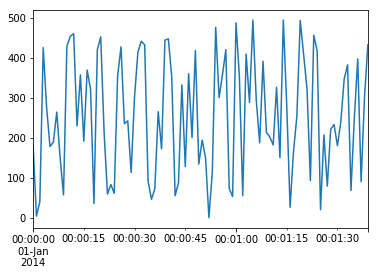

In [107]:
ts.plot()

In [ ]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

In [ ]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [ ]:
# Pandas plot function will print with labels as default

In [ ]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas